# BRAIN Project - Data Analysis Notebook

Ce notebook montre comment utiliser le module `data_analysis` pour analyser les résultats des batchs et générer des visualisations pour articles scientifiques.

## Table des matières
1. [Setup](#1-setup)
2. [Chargement des données](#2-chargement-des-données)
3. [Exploration des données](#3-exploration-des-données)
4. [Métriques statistiques](#4-métriques-statistiques)
5. [Visualisations](#5-visualisations)
6. [Export pour publication](#6-export-pour-publication)

## 1. Setup

In [59]:
# Imports
import sys
from pathlib import Path

# Ajouter le répertoire parent au path
sys.path.insert(0, str(Path.cwd().parent))

# Imports du module data_analysis
from data_analysis import DataLoader, MetricsCalculator, AnalysisVisualizer, ReportGenerator

# Autres imports utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuration matplotlib pour notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

print("✓ Setup complete!")

✓ Setup complete!


## 2. Chargement des données

In [60]:
# Créer un DataLoader
loader = DataLoader()

# Charger tous les batchs depuis le répertoire results/
# Modifier le chemin si nécessaire
results_dir = "../results/"

df = loader.load_all_batches(results_dir)

print(f"\n📊 Loaded {len(df)} task results")

Found 2 batch folders
  ✓ Loaded batch_20260129_105921: 16 tasks
  ✓ Loaded batch_20260129_111236: 52 tasks

Total: 68 task results loaded

📊 Loaded 68 task results


In [61]:
# Alternative: charger un seul batch
# df = loader.load_batch("../results/batch_20260129_XXXXXX/")

# Ou charger depuis un CSV
# df = loader.load_csv("../analysis/full_data.csv")

## 3. Exploration des données

In [62]:
# Aperçu du DataFrame
print("Colonnes disponibles:")
print(df.columns.tolist())

Colonnes disponibles:
['task_id', 'task_file', 'success', 'is_correct', 'accuracy', 'execution_time', 'detected_transformations', 'action_used', 'error_message', 'num_train_examples', 'num_test_examples', 'grid_size', 'primary_transformation', 'transformation_confidence', 'transformation_params', 'was_fallback_used', 'llm_proposed_action', 'fallback_reason', 'batch_id', 'model', 'batch_timestamp', 'program_version', 'timing_total', 'timing_llm_response', 'timing_detection', 'timing_action_execution', 'complexity_mode', 'complexity_num_colors', 'complexity_num_objects']


In [63]:
# Premières lignes
df.head()

,task_id,task_file,success,is_correct,accuracy,execution_time,detected_transformations,action_used,error_message,num_train_examples,...,model,batch_timestamp,program_version,timing_total,timing_llm_response,timing_detection,timing_action_execution,complexity_mode,complexity_num_colors,complexity_num_objects
0,task_add_border,data/task_add_border.json,True,True,1.0,6.636166,"[add_border, add_border, add_border]",color_change,None,3,...,llama3,2026-01-29T10:59:21.463232,1.10.0,6.636,6.397,0.000,0.001,single,1,0
1,task_blob_color_change,data/task_blob_color_change.json,True,True,1.0,4.978905,"[color_change, color_change]",color_change,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,4.979,4.970,0.001,0.000,single,1,0
2,task_blob_reflection,data/task_blob_reflection.json,True,True,1.0,4.933386,"[reflection, rotation, reflection, rotation]",reflect,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,4.933,4.925,0.000,0.003,single,1,0
3,task_blob_rotation,data/task_blob_rotation.json,True,True,1.0,4.936360,"[rotation, rotation]",rotate,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,4.936,4.927,0.001,0.001,single,1,0
4,task_blob_translation,data/task_blob_translation.json,True,True,1.0,6.420048,"[translation, translation]",translate,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,6.420,6.408,0.001,0.003,single,1,0


In [64]:
# Statistiques de base
df.describe()

,accuracy,execution_time,num_train_examples,num_test_examples,transformation_confidence,timing_total,timing_llm_response,timing_detection,timing_action_execution,complexity_num_colors,complexity_num_objects
count,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,0.976305,6.296215,2.058824,1.0,0.911765,6.296206,5.233750,0.000647,0.000412,1.161765,0.0
std,0.062170,2.473075,0.237044,0.0,0.285746,2.473078,2.313904,0.000894,0.000696,0.444210,0.0
min,0.666667,3.710646,2.000000,1.0,0.000000,3.711000,0.000000,0.000000,0.000000,1.000000,0.0
25%,1.000000,4.917358,2.000000,1.0,1.000000,4.917500,4.896250,0.000000,0.000000,1.000000,0.0
50%,1.000000,5.031759,2.000000,1.0,1.000000,5.032000,4.969000,0.000000,0.000000,1.000000,0.0
75%,1.000000,6.740055,2.000000,1.0,1.000000,6.740000,6.399250,0.001000,0.001000,1.000000,0.0
max,1.000000,15.033088,3.000000,1.0,1.000000,15.033000,13.170000,0.004000,0.003000,3.000000,0.0


In [65]:
# Distribution des transformations
if 'primary_transformation' in df.columns:
    print("Distribution des transformations:")
    print(df['primary_transformation'].value_counts())

Distribution des transformations:
primary_transformation
translation     13
composite       11
reflection      10
rotation         7
tiling           7
draw_line        6
add_border       5
color_change     3
Name: count, dtype: int64


In [66]:
# Distribution des modèles (si plusieurs)
if 'model' in df.columns:
    print("Modèles utilisés:")
    print(df['model'].value_counts())

Modèles utilisés:
model
llama3    68
Name: count, dtype: int64


In [67]:
# Taux de succès global
print(f"Accuracy moyenne: {df['accuracy'].mean():.1%}")
print(f"Taux de succès (100%): {df['is_correct'].mean():.1%}")
print(f"Taux d'échec: {(~df['success']).mean():.1%}")

Accuracy moyenne: 97.6%
Taux de succès (100%): 82.4%
Taux d'échec: 0.0%


## 4. Métriques statistiques

In [68]:
# Créer un calculateur de métriques
calc = MetricsCalculator(df)

In [69]:
# Accuracy globale
overall = calc.overall_accuracy()
print("📊 Accuracy globale:")
for key, value in overall.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

📊 Accuracy globale:
  mean: 0.9763
  std: 0.0622
  min: 0.6667
  max: 1.0000
  median: 1.0000
  count: 68


In [70]:
# Accuracy par type de transformation
acc_by_trans = calc.accuracy_by_transformation()
print("📊 Accuracy par transformation:")
acc_by_trans

📊 Accuracy par transformation:


,mean,std,count,min,max,success_rate
primary_transformation,,,,,,
add_border,1.0000,0.0000,5,1.0000,1.0,1.0000
color_change,1.0000,0.0000,3,1.0000,1.0,1.0000
draw_line,1.0000,0.0000,6,1.0000,1.0,1.0000
tiling,1.0000,0.0000,7,1.0000,1.0,1.0000
translation,1.0000,0.0000,13,1.0000,1.0,1.0000
rotation,0.9710,0.0498,7,0.8906,1.0,0.7143
reflection,0.9542,0.1084,10,0.6667,1.0,0.8000
composite,0.9437,0.0677,11,0.8125,1.0,0.4545


In [71]:
# Accuracy par modèle (si plusieurs modèles)
acc_by_model = calc.accuracy_by_model()
if not acc_by_model.empty:
    print("📊 Accuracy par modèle:")
    display(acc_by_model)

📊 Accuracy par modèle:


,mean,std,count,min,max,success_rate
model,,,,,,
llama3,0.9763,0.0622,68,0.6667,1.0,0.8235


In [72]:
# Comparaison LLM vs Fallback
llm_fb = calc.llm_vs_fallback_comparison()
print("🤖 LLM vs Fallback:")
for key, value in llm_fb.items():
    if isinstance(value, dict):
        print(f"  {key}:")
        for k, v in value.items():
            print(f"    {k}: {v:.4f}" if isinstance(v, float) else f"    {k}: {v}")
    else:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

🤖 LLM vs Fallback:
  llm_only:
    count: 52
    accuracy_mean: 0.9809
    accuracy_std: 0.0622
    success_rate: 0.8846
  with_fallback:
    count: 16
    accuracy_mean: 0.9613
    accuracy_std: 0.0615
    success_rate: 0.6250
  fallback_usage_rate: 0.2353


In [73]:
# Statistiques de timing
timing = calc.timing_statistics()
print("⏱️ Timing (secondes):")
for component, stats in timing.items():
    print(f"  {component}: mean={stats['mean']:.3f}s, std={stats['std']:.3f}s")

⏱️ Timing (secondes):
  total: mean=6.296s, std=2.473s
  llm: mean=5.234s, std=2.314s
  detection: mean=0.001s, std=0.001s
  execution: mean=0.000s, std=0.001s
  total_legacy: mean=6.296s, std=2.473s


In [74]:
# T-test entre deux groupes (exemple: deux transformations)
# Décommenter et modifier selon vos données

# transformations = df['primary_transformation'].unique()
# if len(transformations) >= 2:
#     t1, t2 = transformations[0], transformations[1]
#     ttest = calc.compare_models_ttest(t1, t2, metric='accuracy')
#     print(f"T-test {t1} vs {t2}:")
#     print(f"  p-value: {ttest['p_value']:.4f}")
#     print(f"  Significatif (α=0.05): {ttest['significant_005']}")

## 5. Visualisations

In [75]:
# Créer un visualiseur
viz = AnalysisVisualizer(df, style="publication")

### 5.1 Accuracy par transformation

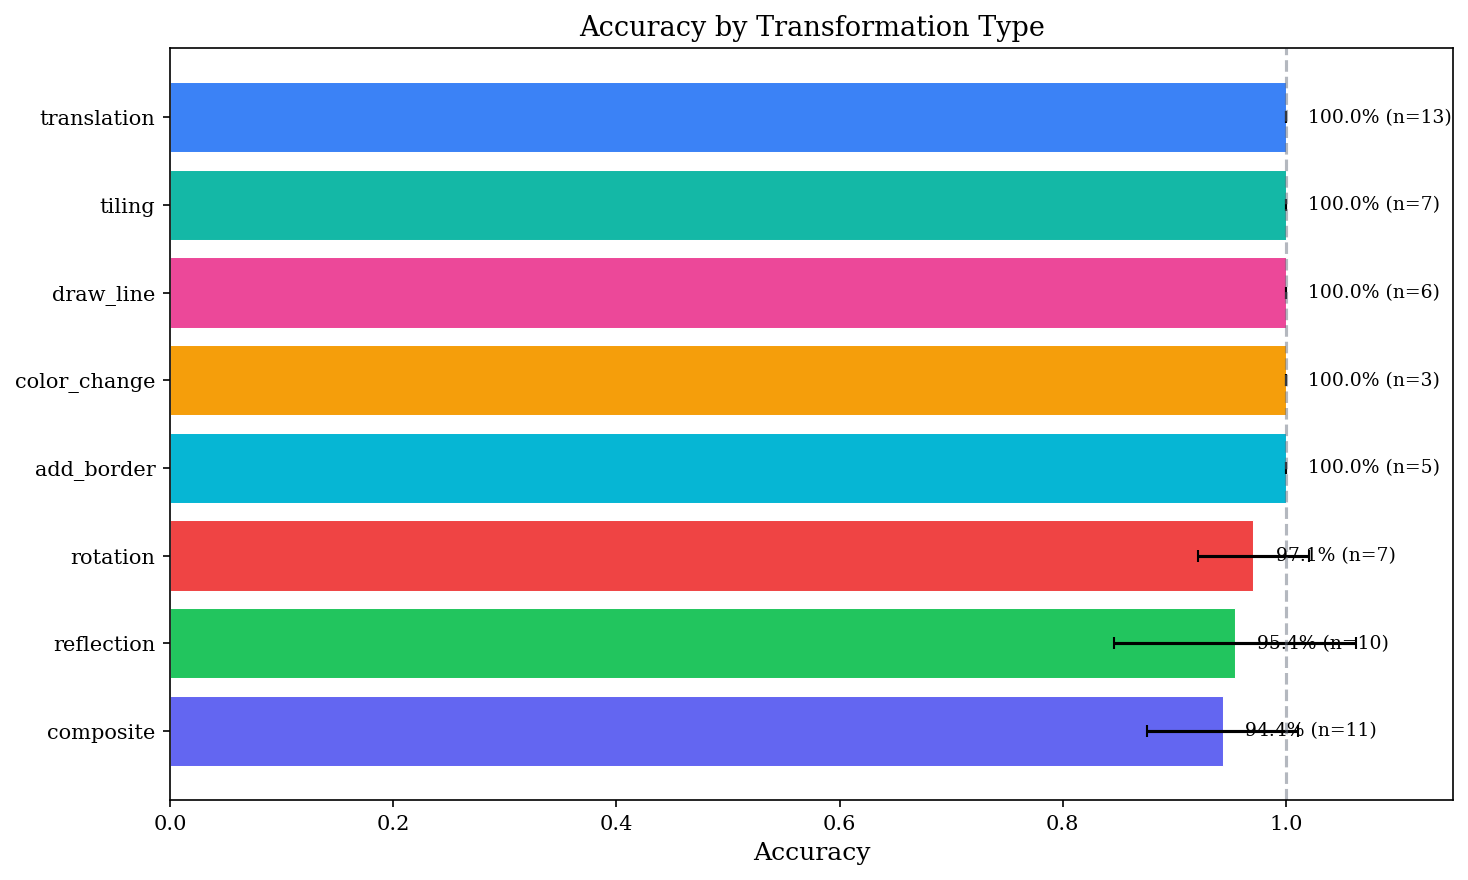

In [76]:
# Barplot horizontal de l'accuracy par transformation
fig = viz.plot_accuracy_by_transformation(figsize=(10, 6), show_std=True)
plt.show()

### 5.2 Boxplot de la distribution

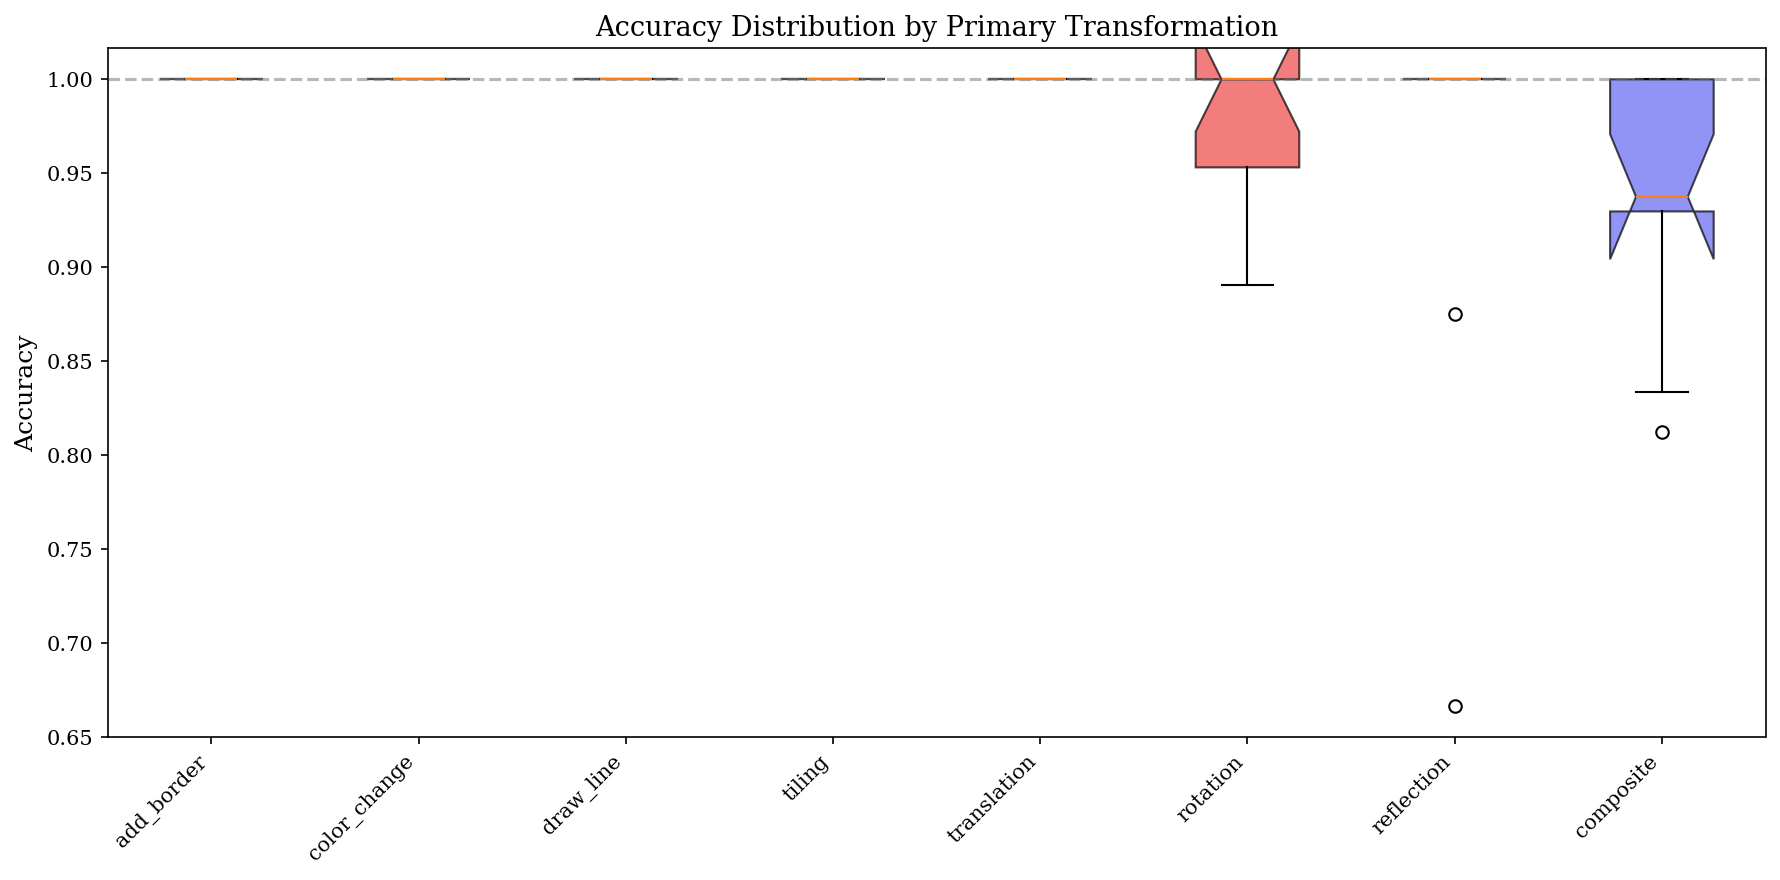

In [77]:
# Boxplot de l'accuracy
fig = viz.plot_accuracy_boxplot(group_by='primary_transformation', figsize=(12, 6))
plt.show()

### 5.3 Comparaison des modèles

In [78]:
# Comparaison des modèles (si plusieurs modèles)
if df['model'].nunique() > 1:
    fig = viz.plot_model_comparison(figsize=(10, 6))
    plt.show()
else:
    print("Un seul modèle dans les données - comparaison non disponible")

Un seul modèle dans les données - comparaison non disponible


### 5.4 LLM vs Fallback

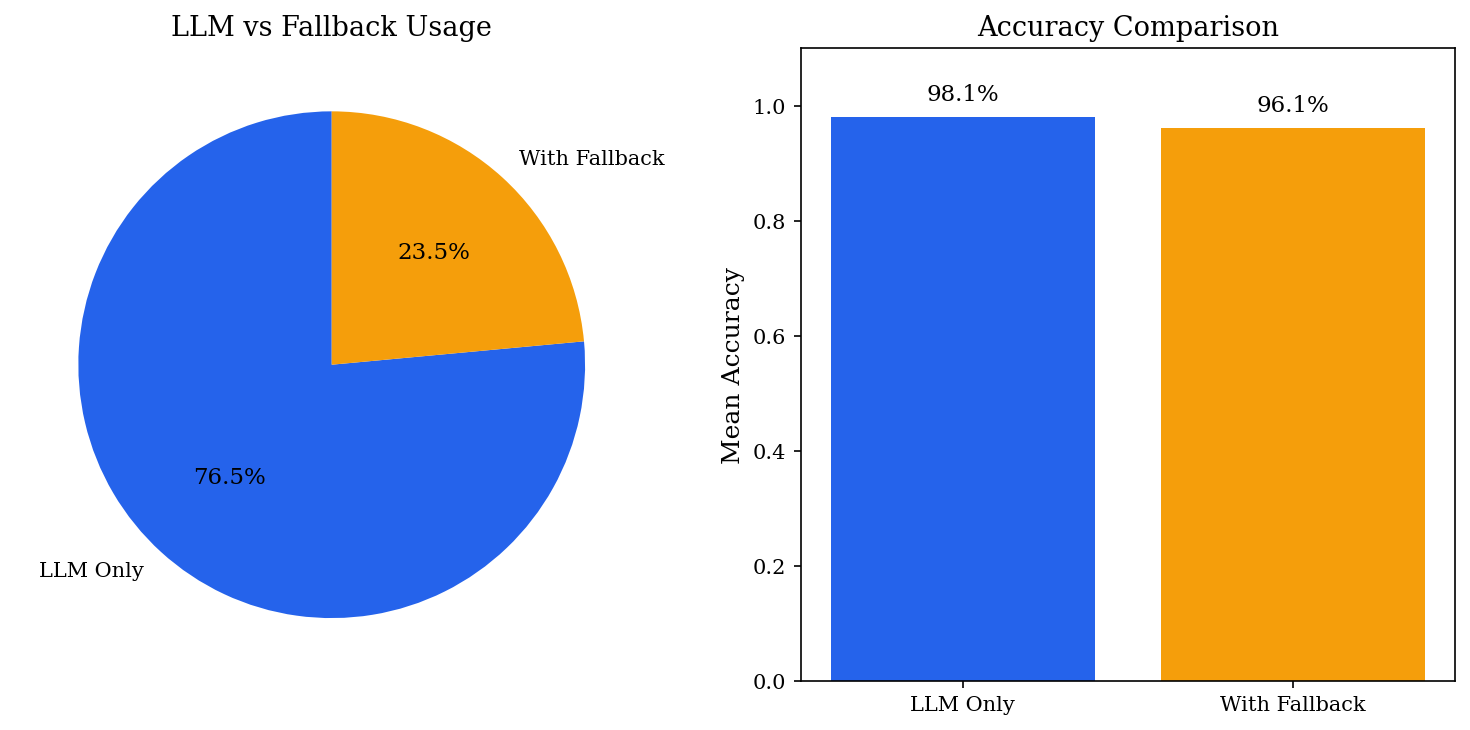

In [79]:
# Comparaison LLM vs Fallback
fig = viz.plot_llm_vs_fallback(figsize=(10, 5))
plt.show()

### 5.5 Décomposition du timing

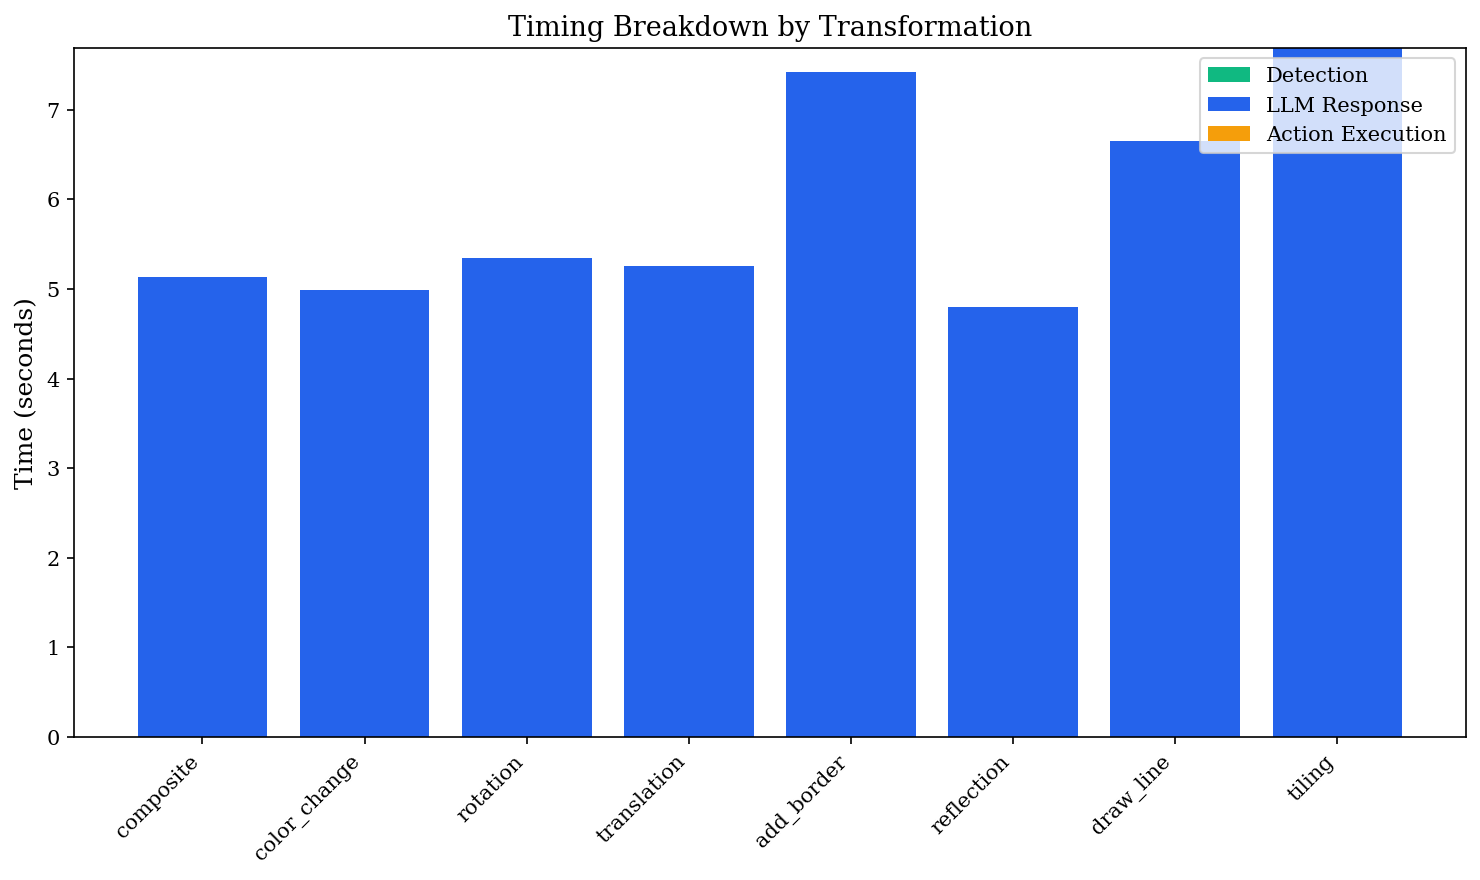

In [80]:
# Timing breakdown
fig = viz.plot_timing_breakdown(figsize=(10, 6))
plt.show()

### 5.6 Matrice de confusion

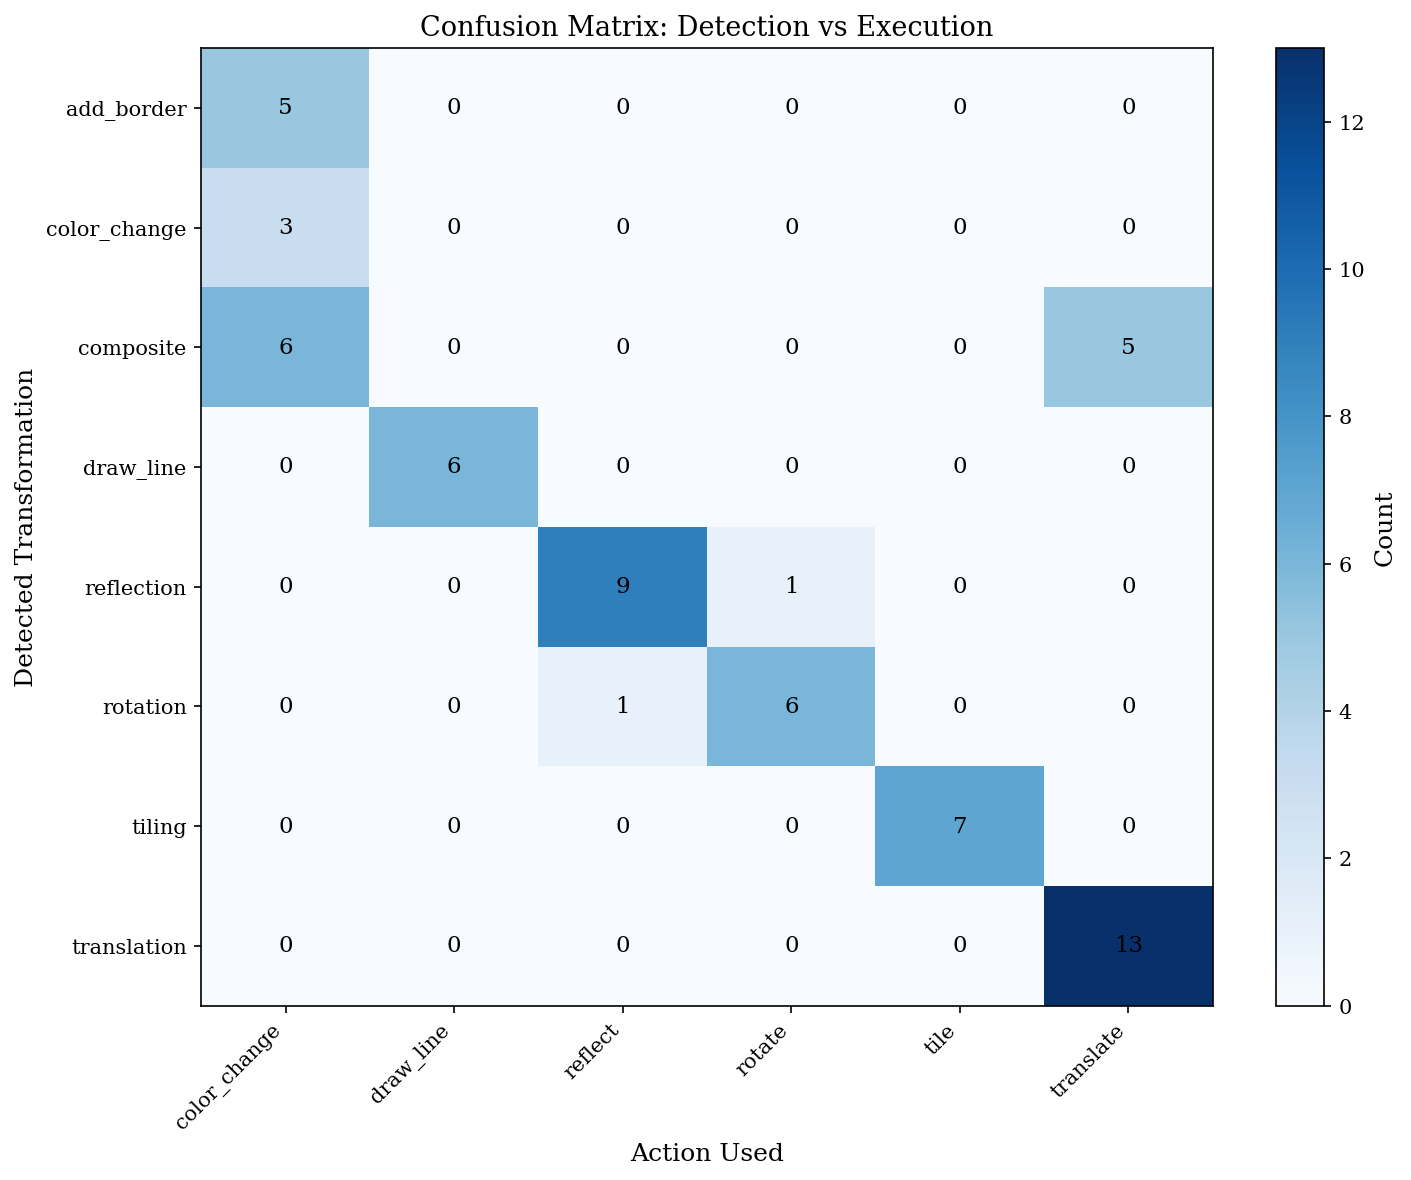

In [81]:
# Matrice de confusion: transformation détectée vs action utilisée
fig = viz.plot_confusion_matrix(figsize=(10, 8))
plt.show()

### 5.7 Visualisations personnalisées

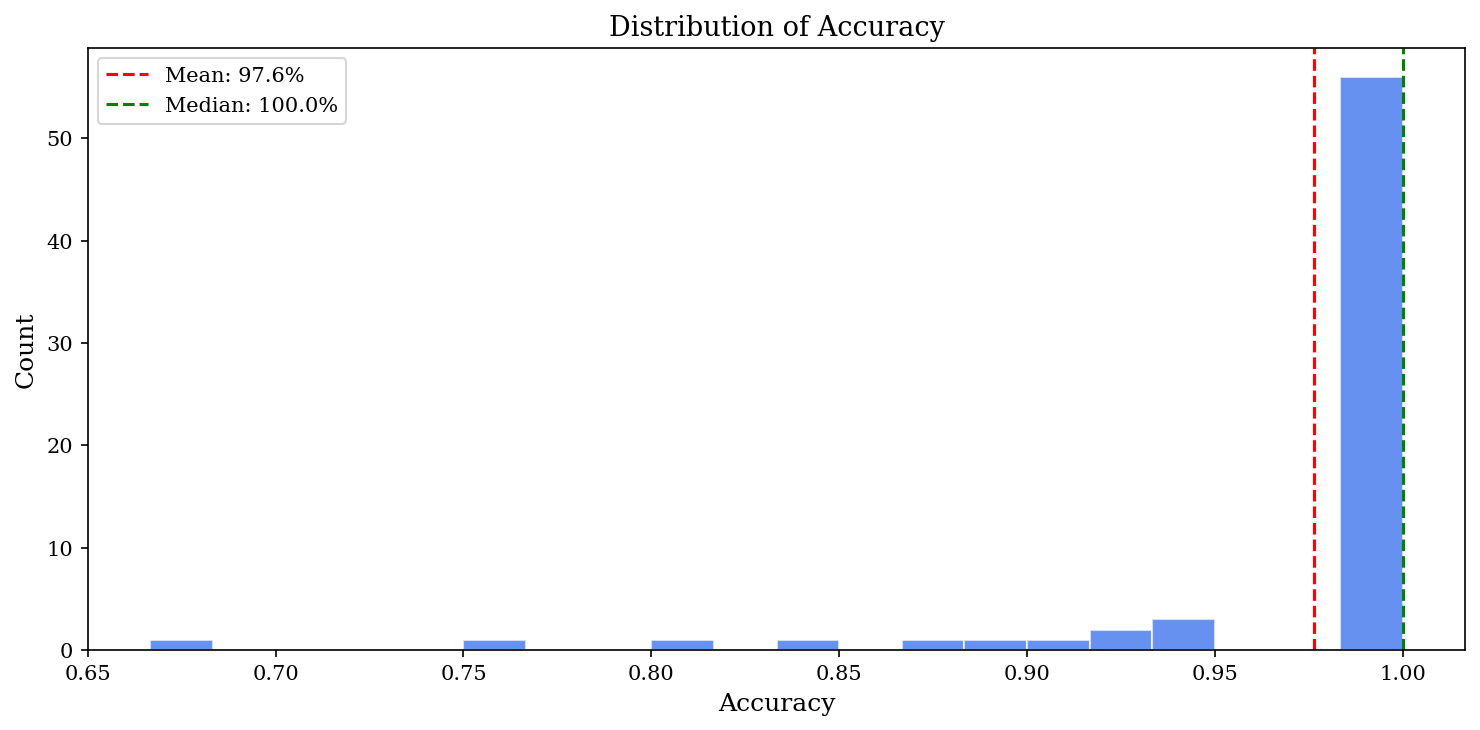

In [82]:
# Exemple: histogramme de l'accuracy
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['accuracy'], bins=20, edgecolor='white', alpha=0.7, color='#2563eb')
ax.axvline(df['accuracy'].mean(), color='red', linestyle='--', label=f'Mean: {df["accuracy"].mean():.1%}')
ax.axvline(df['accuracy'].median(), color='green', linestyle='--', label=f'Median: {df["accuracy"].median():.1%}')

ax.set_xlabel('Accuracy')
ax.set_ylabel('Count')
ax.set_title('Distribution of Accuracy')
ax.legend()

plt.tight_layout()
plt.show()

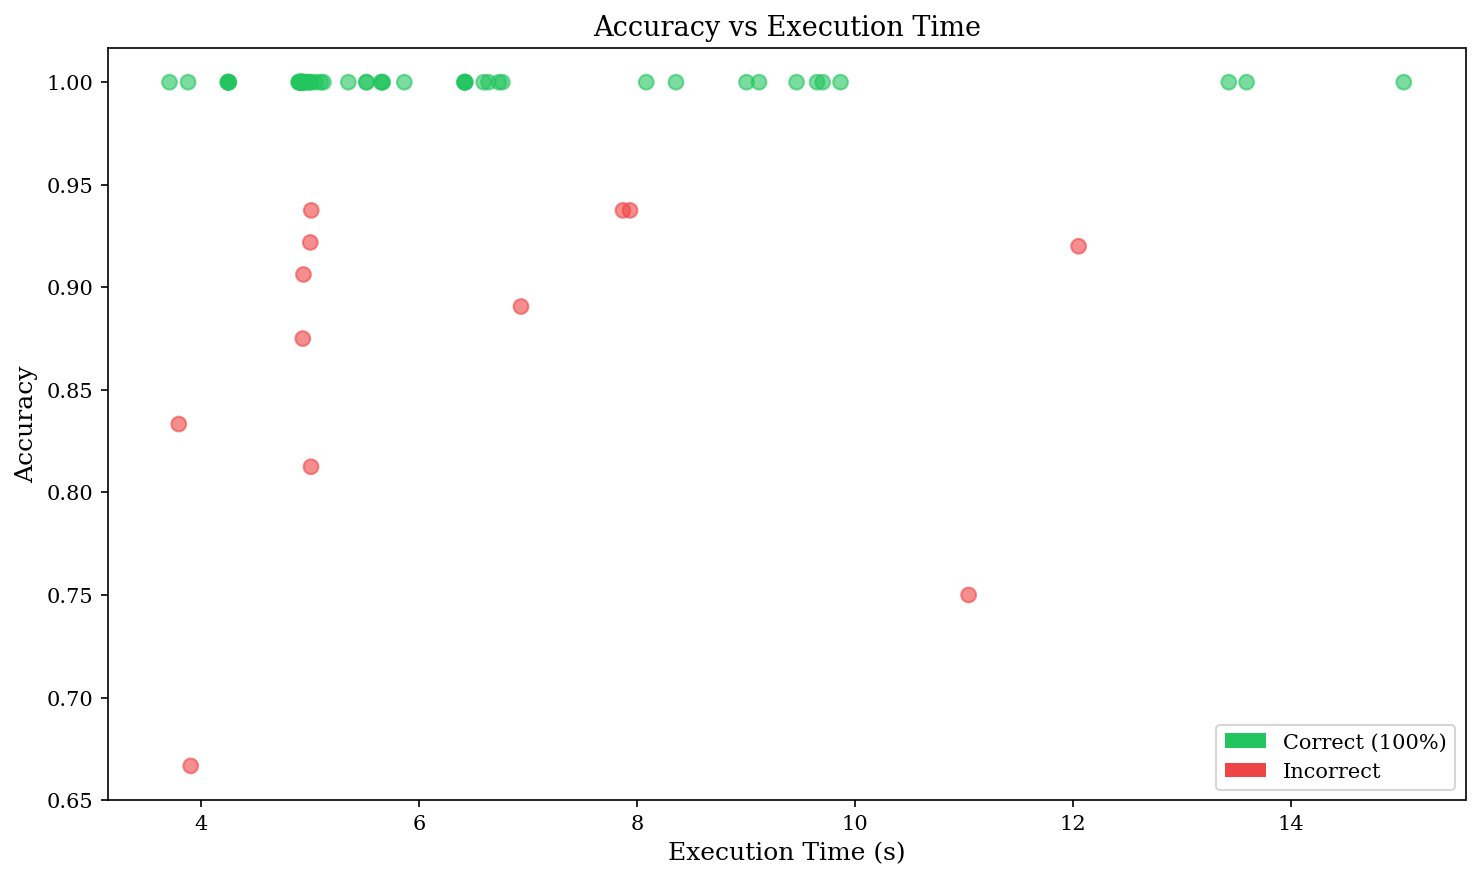

In [83]:
# Exemple: scatter plot accuracy vs temps d'exécution
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    df['execution_time'], 
    df['accuracy'],
    c=df['is_correct'].map({True: '#22c55e', False: '#ef4444'}),
    alpha=0.6,
    s=50
)

ax.set_xlabel('Execution Time (s)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Execution Time')

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#22c55e', label='Correct (100%)'),
    Patch(facecolor='#ef4444', label='Incorrect')
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## 6. Export pour publication

In [84]:
# Créer un générateur de rapports
gen = ReportGenerator(df, calc)

In [85]:
# Générer des tableaux LaTeX
output_dir = "../analysis/"
gen.generate_latex_tables(output_dir + "latex/")

Generated: ../analysis/latex/brain_accuracy_transformation.tex
Generated: ../analysis/latex/brain_llm_fallback.tex
Generated: ../analysis/latex/brain_timing.tex


In [86]:
# Générer un rapport Markdown
gen.generate_markdown_report(output_dir + "report.md")

Generated: ../analysis/report.md


In [87]:
# Exporter en CSV
gen.generate_csv_summary(output_dir + "summary.csv")
gen.export_full_data(output_dir + "full_data.csv")

Generated: ../analysis/summary.csv
Exported: ../analysis/full_data.csv


In [88]:
# Sauvegarder toutes les figures
figures_dir = output_dir + "figures/"
Path(figures_dir).mkdir(parents=True, exist_ok=True)

# Sauvegarder chaque figure
viz.plot_accuracy_by_transformation(save_path=figures_dir + "accuracy_by_transformation.png")
viz.plot_accuracy_boxplot(save_path=figures_dir + "accuracy_boxplot.png")
viz.plot_llm_vs_fallback(save_path=figures_dir + "llm_vs_fallback.png")
viz.plot_timing_breakdown(save_path=figures_dir + "timing_breakdown.png")

print(f"\n✓ Figures saved to {figures_dir}")

Saved: ../analysis/figures/accuracy_by_transformation.png
Saved: ../analysis/figures/accuracy_boxplot.png
Saved: ../analysis/figures/llm_vs_fallback.png
Saved: ../analysis/figures/timing_breakdown.png

✓ Figures saved to ../analysis/figures/


In [89]:
# Sauvegarder aussi en PDF pour LaTeX
viz.save_all(figures_dir, format="pdf")

Saved: ../analysis/figures/accuracy_by_transformation.pdf
Saved: ../analysis/figures/accuracy_boxplot.pdf
Saved: ../analysis/figures/llm_vs_fallback.pdf
Saved: ../analysis/figures/timing_breakdown.pdf
Saved: ../analysis/figures/confusion_matrix.pdf


## 7. Analyses avancées (bonus)

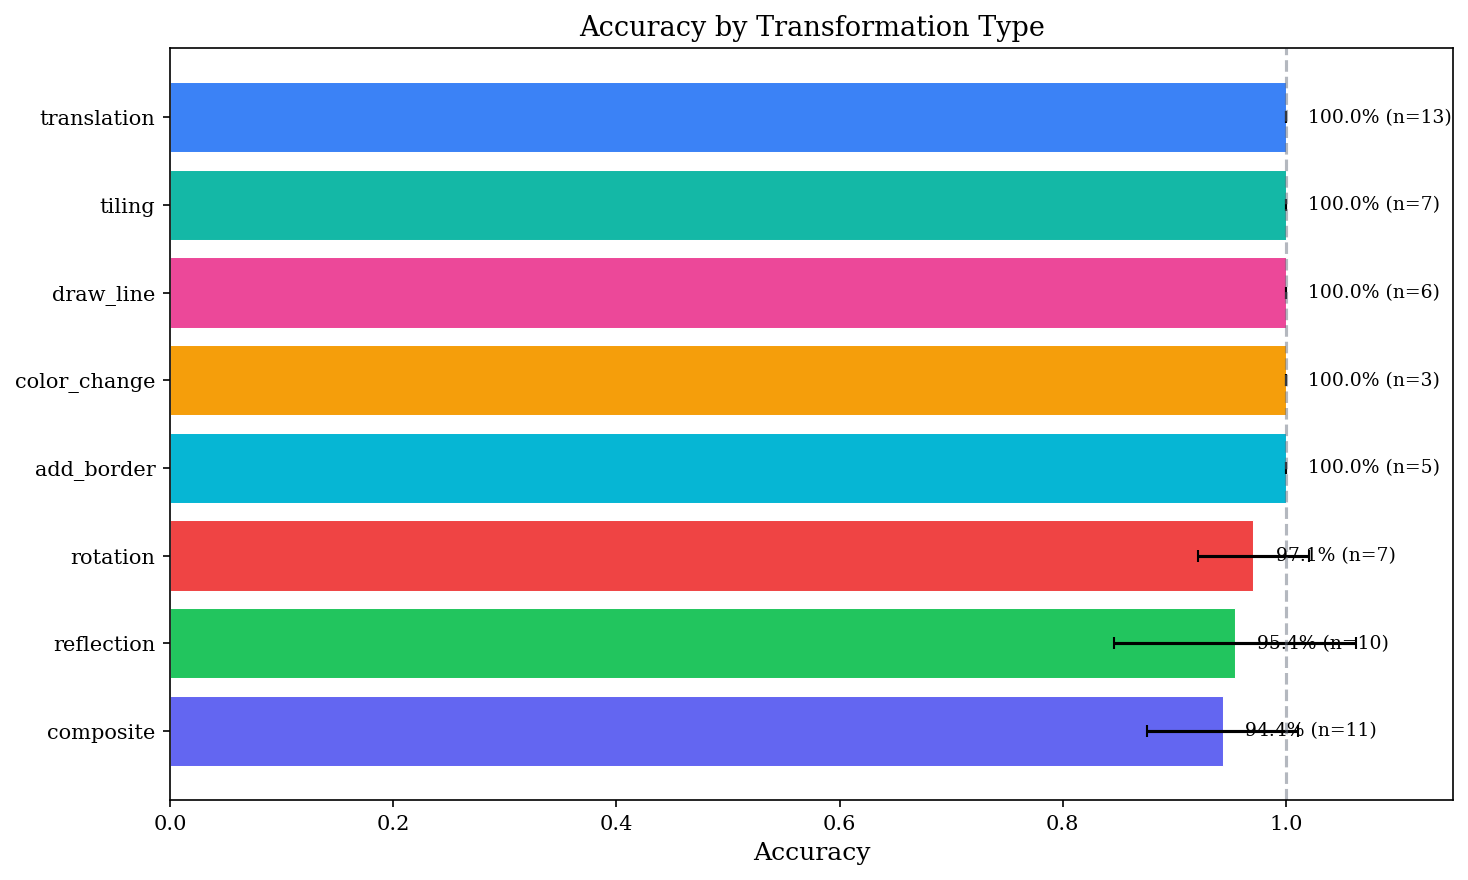

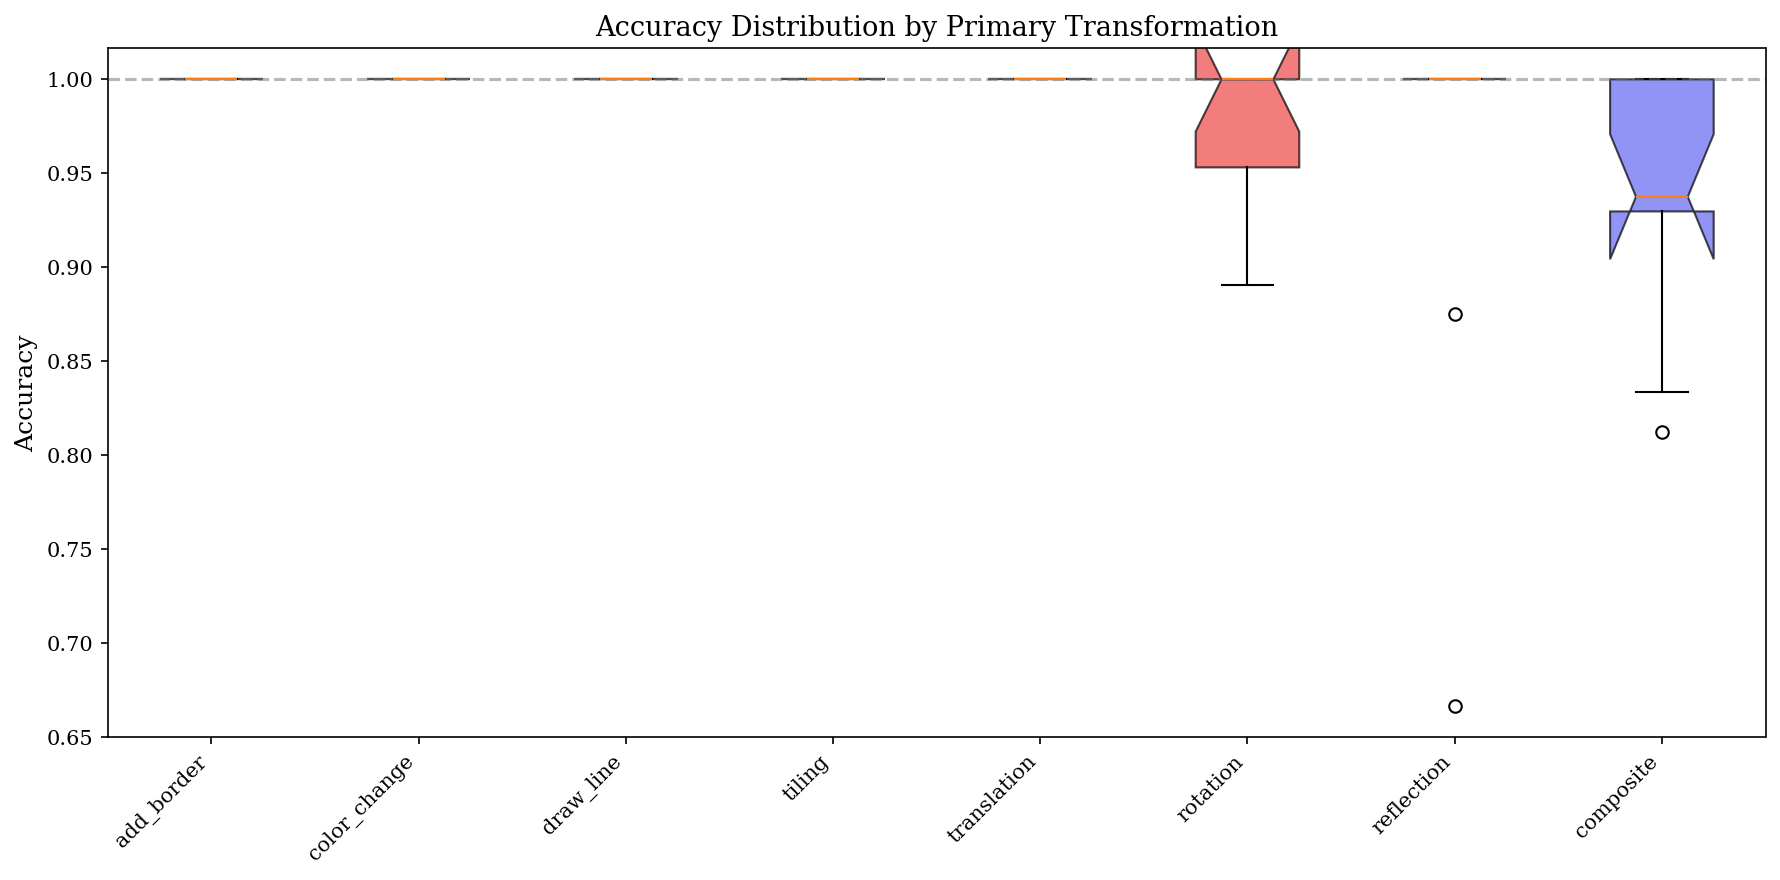

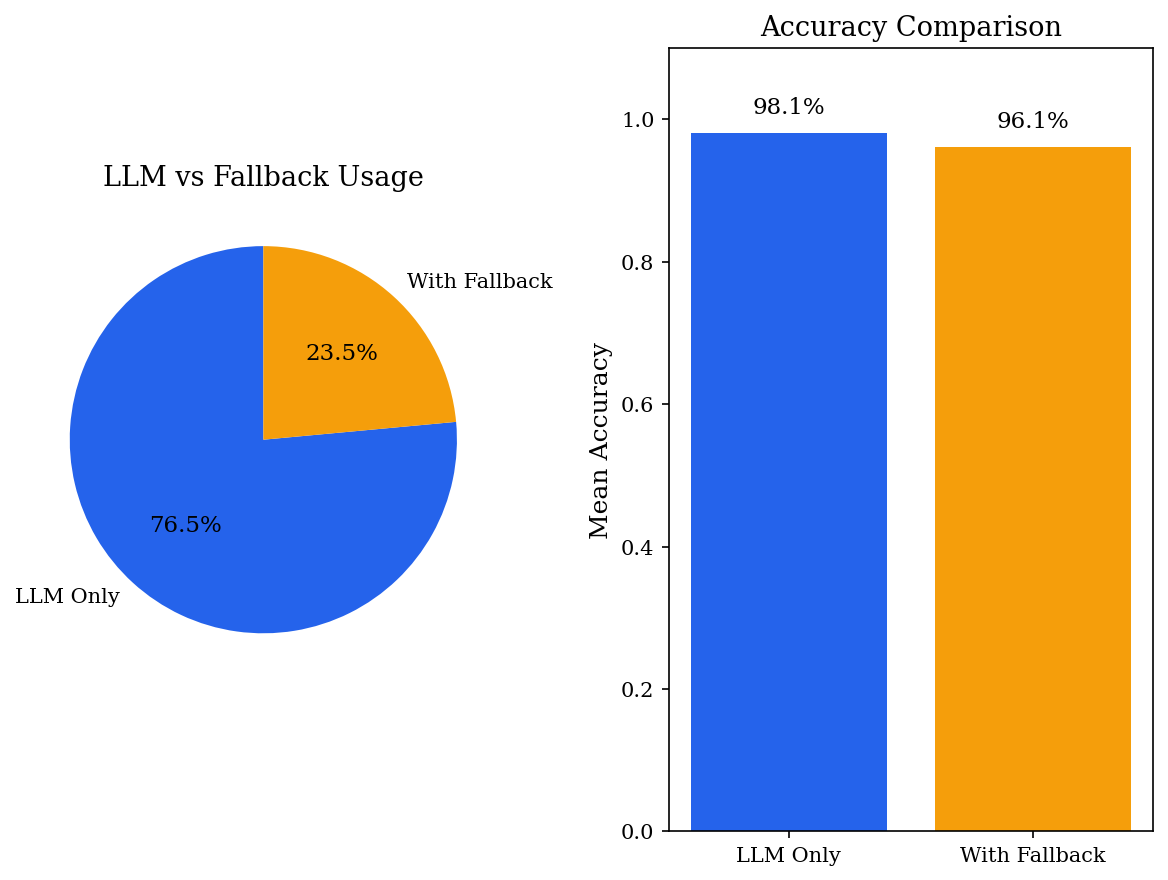

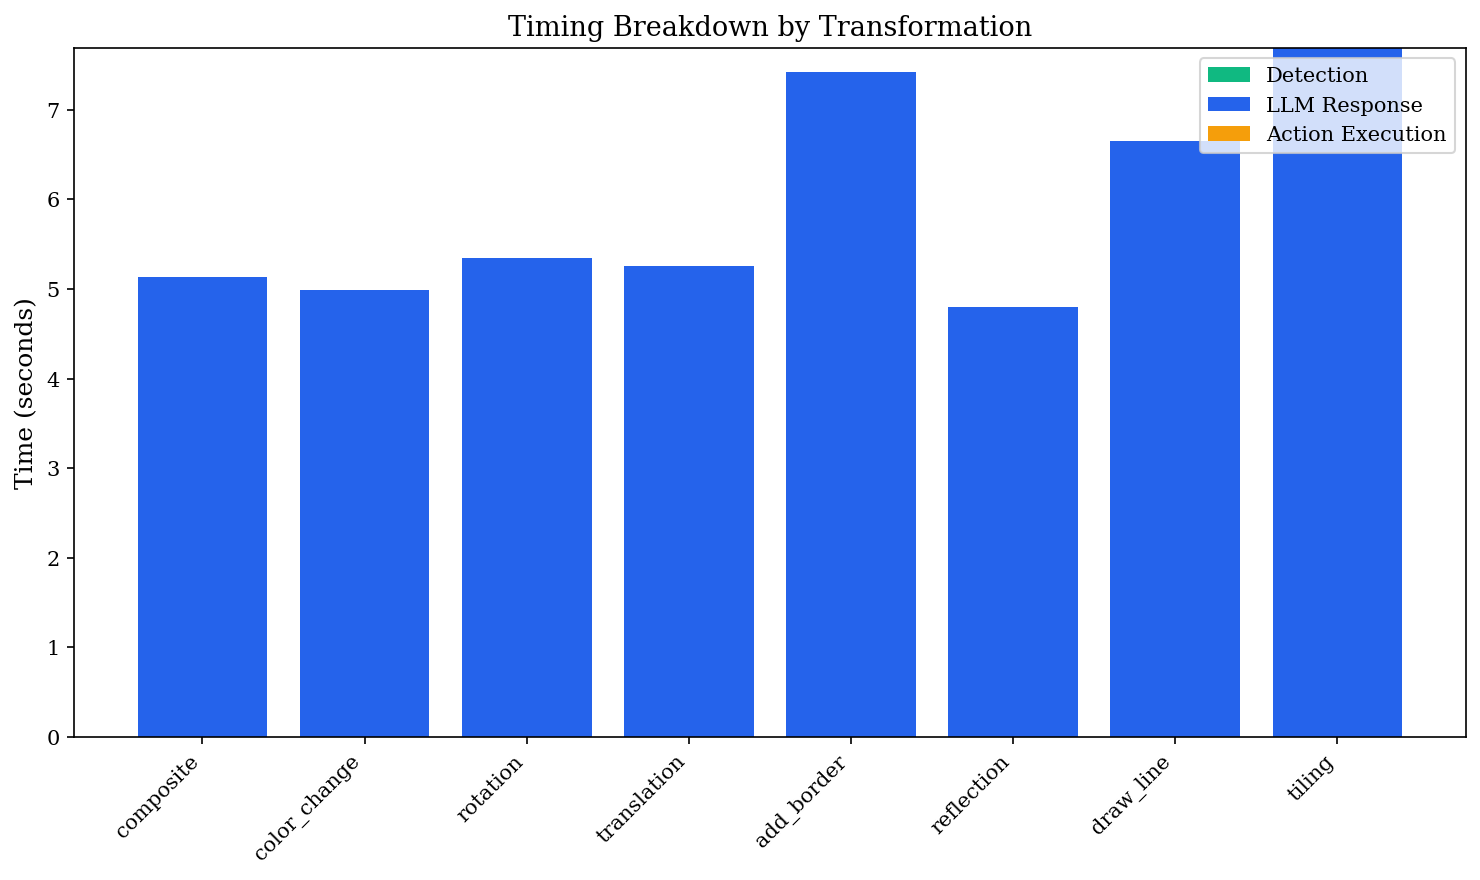

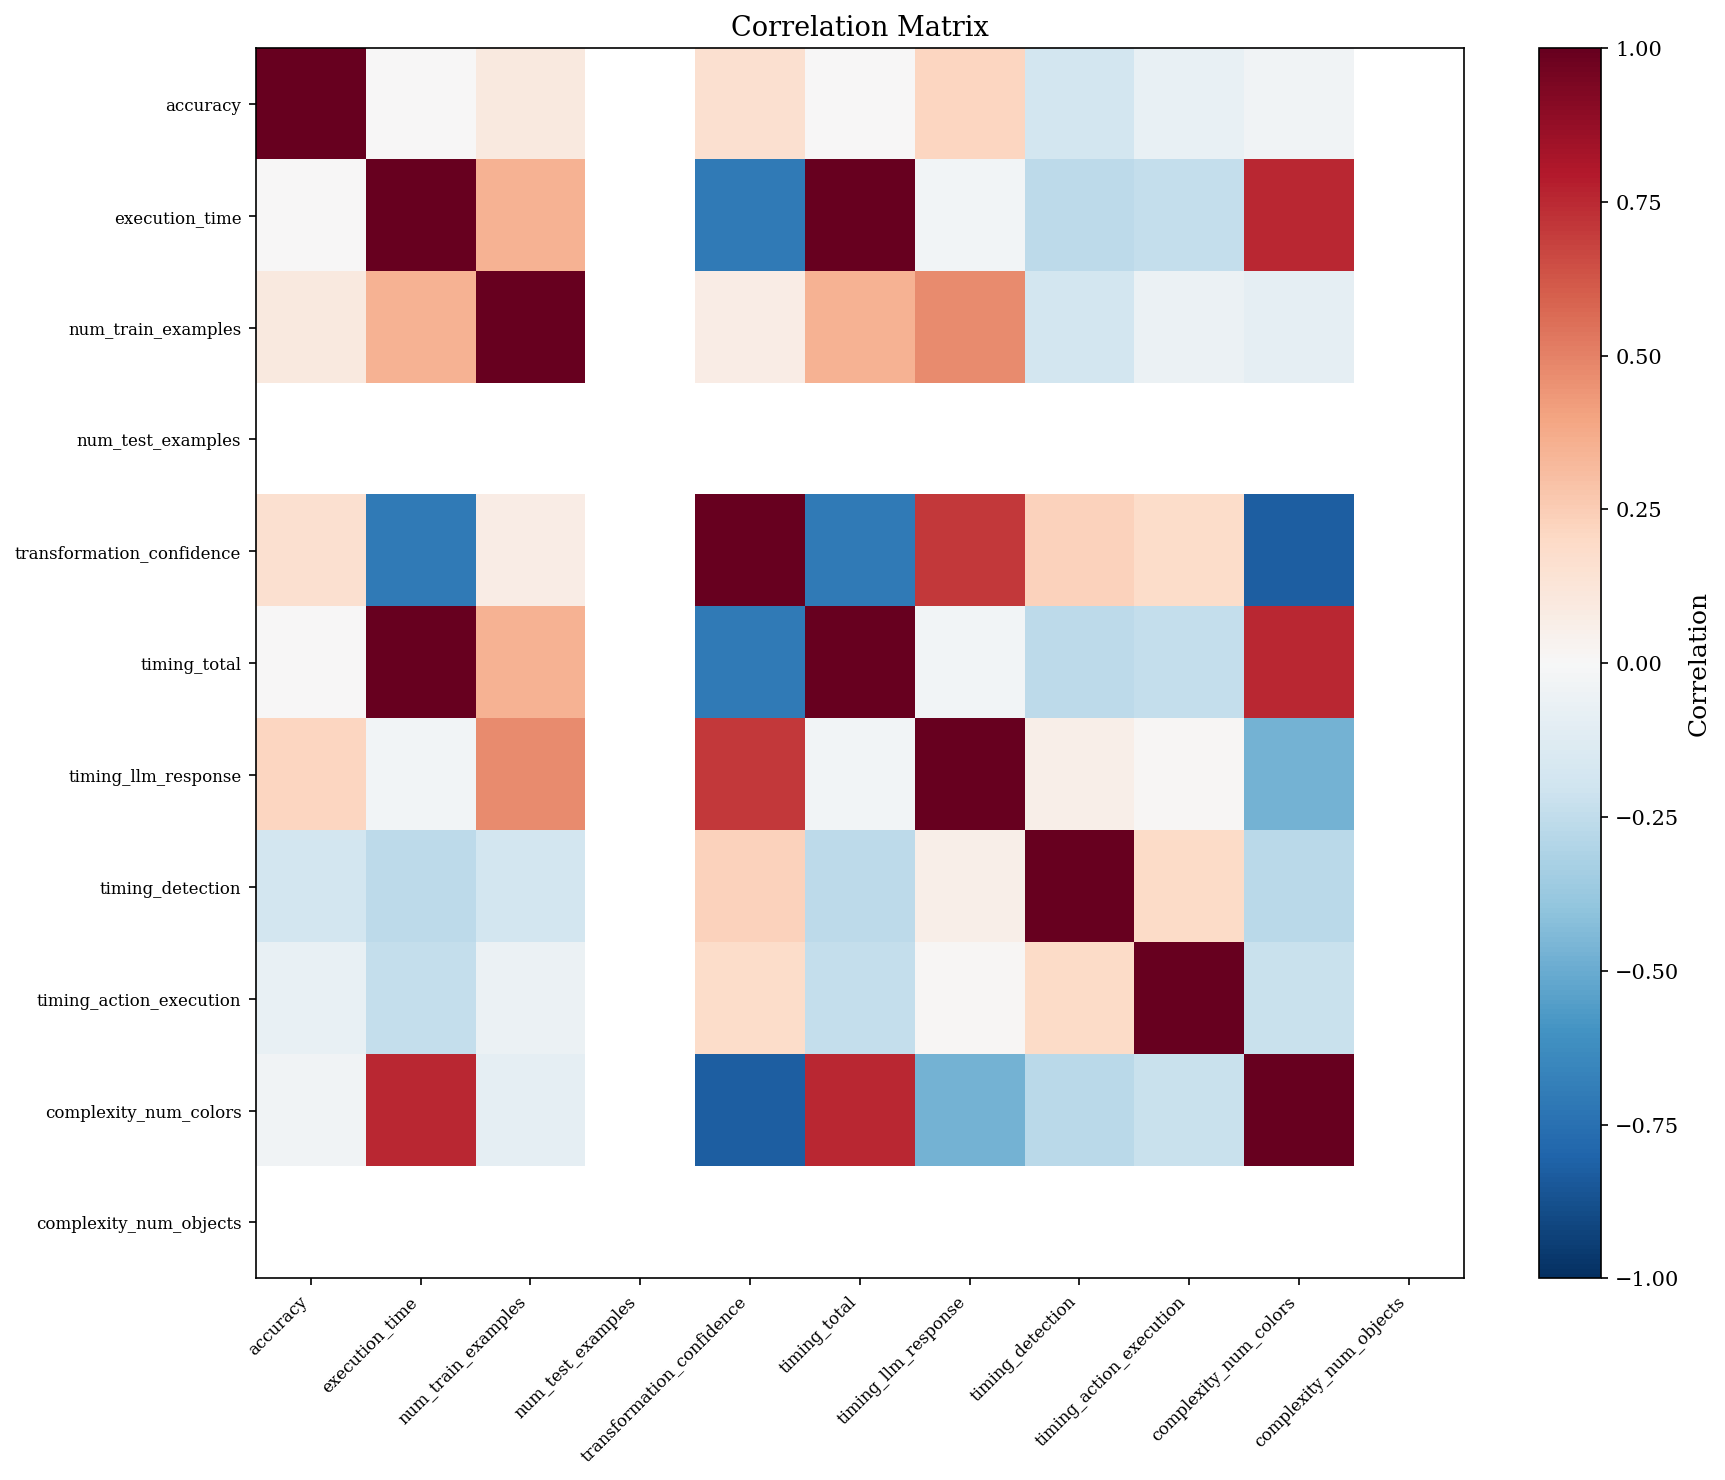

In [90]:
# Corrélations entre variables
corr = calc.correlation_analysis()

# Heatmap des corrélations
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(corr.index, fontsize=8)

plt.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [91]:
# Analyse par complexité (nombre de couleurs)
if 'complexity_num_colors' in df.columns:
    acc_by_complexity = calc.accuracy_by_complexity('complexity_num_colors')
    print("Accuracy par nombre de couleurs:")
    display(acc_by_complexity)

Accuracy par nombre de couleurs:


,mean,std,count
complexity_num_colors,,,
1,0.9783,0.0588,59
2,0.9529,0.0943,7
3,1.0000,0.0000,2


In [92]:
# Tâches les plus difficiles (accuracy la plus basse)
print("Top 10 tâches les plus difficiles:")
difficult = df.nsmallest(10, 'accuracy')[['task_id', 'accuracy', 'primary_transformation', 'action_used']]
difficult

Top 10 tâches les plus difficiles:


,task_id,accuracy,primary_transformation,action_used
14,task_reflection,0.666667,reflection,reflect
40,task_multi_objects,0.750000,None,None
30,task_color_change_05,0.812500,composite,color_change
28,task_color_change_03,0.833333,composite,color_change
53,task_rotation_04,0.875000,reflection,rotate
50,task_rotation_01,0.890625,rotation,rotate
52,task_rotation_03,0.906250,rotation,rotate
41,task_multi_objects_same_transform,0.920000,None,None
29,task_color_change_04,0.921875,composite,color_change
6,task_color_change,0.937500,composite,color_change


In [93]:
# Tâches échouées (erreurs)
failed = df[df['success'] == False]
if len(failed) > 0:
    print(f"Tâches échouées: {len(failed)}")
    display(failed[['task_id', 'error_message']].head(10))
else:
    print("Aucune tâche échouée!")

Aucune tâche échouée!


---

## Résumé

Ce notebook a montré comment:

1. **Charger** les données de batch avec `DataLoader`
2. **Explorer** les données avec pandas
3. **Calculer** des métriques statistiques avec `MetricsCalculator`
4. **Visualiser** les résultats avec `AnalysisVisualizer`
5. **Exporter** pour publication avec `ReportGenerator`

### Fichiers générés

- `analysis/latex/*.tex` - Tableaux LaTeX
- `analysis/figures/*.png` - Figures PNG
- `analysis/figures/*.pdf` - Figures PDF (pour LaTeX)
- `analysis/report.md` - Rapport Markdown
- `analysis/summary.csv` - Résumé CSV
- `analysis/full_data.csv` - Données complètes